In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from Scores import *
from create_dataframe import *
from create_dataframe_regression import * 
from logistic_regression import *
import time
import warnings
warnings.filterwarnings("ignore")
from Random_forest import *
from GradientBoosting import *
from logistic_regression_l2 import * 
#from logistic_regression_optimise import * 


C:\Users\Tristan\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dfreg=pd.read_csv("dataframe_regression.csv")

In [3]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


In [4]:
PasFaite=dfreg[dfreg['passe']==0]
Faite=dfreg[dfreg['passe']==1]
np.sum(Faite['adversaire_dans_cone'])

3162

In [5]:
dfregOverSample10=pd.concat([dfreg,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite])
dfregOverSample10.to_csv("dataframe_regression_OverSamp.csv")

110429

In [2]:
tous_scores, moyenne_scores , matrices_coefs = regression_logistique_OverSamp (10, 0.7)
tous_scores

['receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


array([0.35325365, 0.36918991, 0.35856574, 0.35922975, 0.35823373,
       0.35258964, 0.3502656 , 0.34296149, 0.36387782, 0.35358566])

255 642
62 649
528 718
90 729
80 818
317 552
291 328
159 525
215 865
443 843
5 811
319 1015
112 709
265 872
142 775
75 846
249 760
400 698
194 578
397 876
218 864
44 785


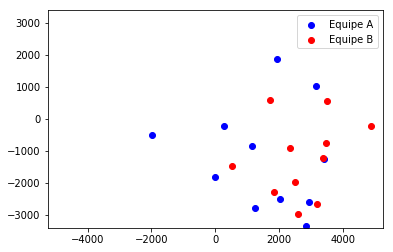

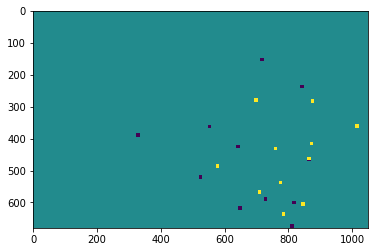

In [4]:
df=pd.read_csv("passes.csv")
df=df.replace(np.nan, 100000)
dfligne=df.iloc[40]
imageC=image(dfligne,True)
plt.imshow(imageC)

<font color='blue'>
On regarde ce que nous renvoie notre fonction directionPasse

Backward


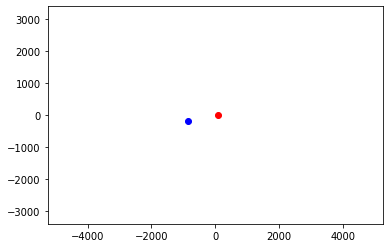

Forward


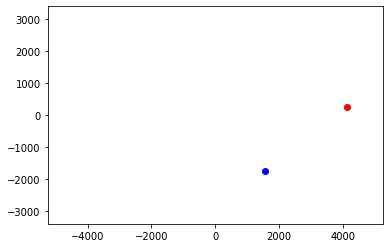

Forward


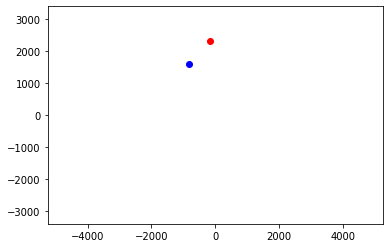

Forward


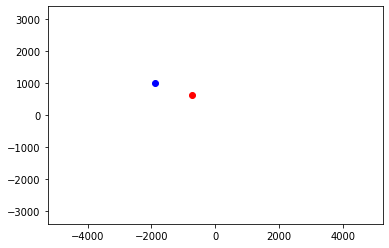

Forward


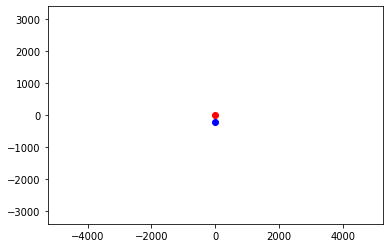

Backward


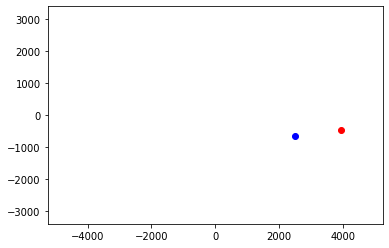

Forward


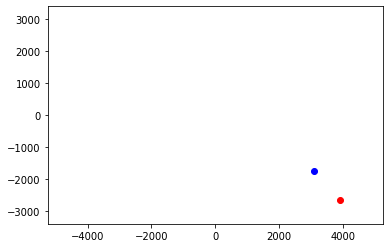

Backward


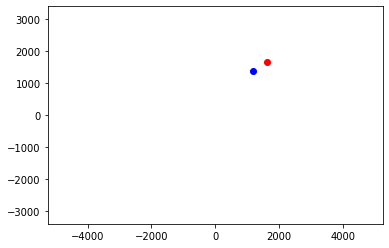

Forward


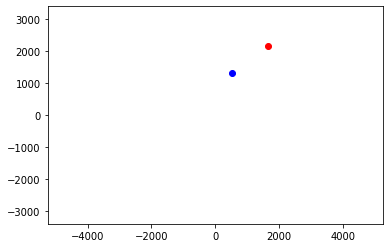

Backward


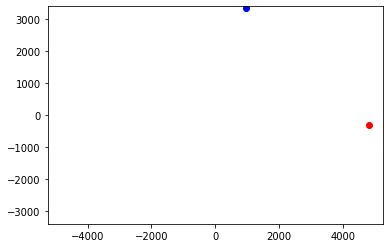

In [29]:
for i in range(10):
    ligne = df.iloc[i]
    sender = df.iloc[i,2]
    receiver = df.iloc[i,3]
    SenderX,SenderY=df.iloc[i,3+sender],df.iloc[i,31+sender]
    ReceiverX,ReceiverY=df.iloc[i,3+receiver],df.iloc[i,31+receiver]
    xmin,xmax,ymin,ymax = -5250, 5250, -3400, 3400
    print(DirectionPasse(ligne))
    plt.scatter(SenderX,SenderY, color='red')
    plt.scatter(ReceiverX,ReceiverY, color='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

<font color='blue'>
Cela semble marcher

<font color='blue'>
  test taux de réussite score1

In [30]:
reussite1 = np.mean(df["predic1"]==df["receiver_id"])
reussite1

0.331507122223329

<font color='blue'>
    score2

In [31]:
reussite2 = np.mean(df["predic2"]==df["receiver_id"])
reussite2

0.39645383006275525

<Font color='blue'>
 score3

In [32]:
reussite3 = np.mean(df["predic3"]==df["receiver_id"])
reussite3

0.39685227612311985

<font color='blue'>
    score4

In [33]:
reussite4 = np.mean(df["predic4"]==df["receiver_id"])
reussite4

0.3831058870405419

<font color = blue>
Ici on crée le dataframe pour la régression logistique

In [4]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L1

In [11]:
x_lrl1, y_lrl1, z_lrl1, h_lrl1, proba_lrl1 = regression_logistique (10, 0.7)

In [12]:
x_lrl1

array([0.4186587 , 0.40504648, 0.42131474, 0.42297477, 0.42961487,
       0.42363878, 0.41733068, 0.42098274, 0.41467463, 0.41633466])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef00711128>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef00711940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef00711828>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef00697128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef006977b8>],
 'means': []}

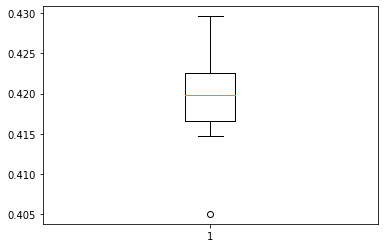

In [13]:
plt.boxplot(x_lrl1)

In [14]:
#moyenne des resultats
y_lrl1

0.41905710491367854

<BarContainer object of 42168 artists>

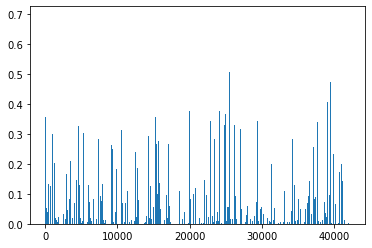

In [8]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl1[:,1])), proba_lrl1[:,1])

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L2

In [16]:
x_lrl2, y_lrl2, z_lrl2, h_lrl2, proba_lrl2 = regression_logistique_l2(10, 0.7)

In [17]:
x_lrl2

array([0.4123506 , 0.42297477, 0.40737052, 0.40537849, 0.4252988 ,
       0.42463479, 0.41699867, 0.40903054, 0.42928287, 0.4000664 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef7e98a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef7e98a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef7e9b4d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef7e98ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef7e9bd198>],
 'means': []}

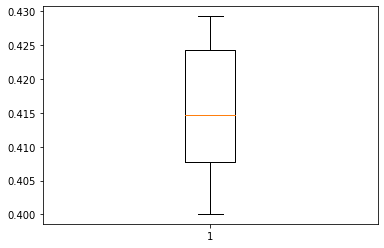

In [18]:
plt.boxplot(x_lrl2)

In [19]:
#moyenne des resultats
y_lrl2

0.41533864541832666

<BarContainer object of 9 artists>

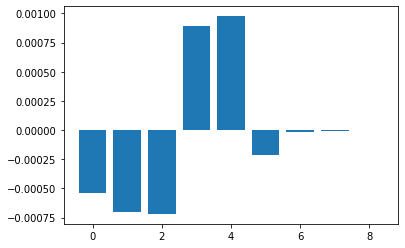

In [20]:
#moyenne des coeffs
plt.bar(range(9), h_lrl2)

<BarContainer object of 42168 artists>

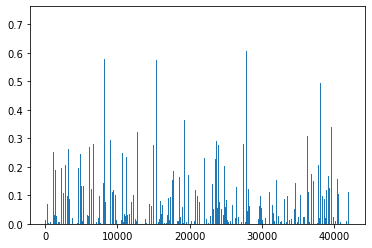

In [31]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl2[:,1])), proba_lrl2[:,1])

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA Random Forest

In [21]:
x_rf, y_rf, z_rf, h_rf, proba_rf = RandomForest (10, 0.7)

In [26]:
x_rf

array([0.41434263, 0.42729084, 0.42729084, 0.43359894, 0.43658699,
       0.42164675, 0.43061089, 0.43857902, 0.42895086, 0.43559097])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef02c9b828>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef02c9b198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef02c9bb38>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef02cbf518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef02cbf860>],
 'means': []}

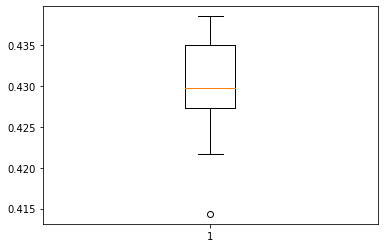

In [32]:
plt.boxplot(x_rf)

In [28]:
#moyenne des resultats
y_rf

0.429448871181939

<BarContainer object of 9 artists>

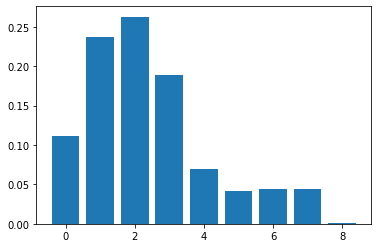

In [29]:
#coeffs
plt.bar(range(9),h_rf)

MemoryError: 

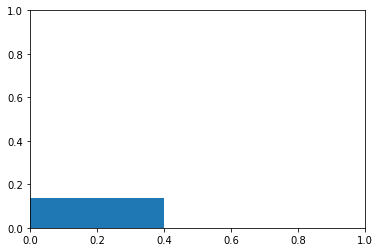

In [36]:
#distribution des probas
plt.bar(np.arange(len(proba_rf[:,1])), proba_rf[:,1])

<font color = 'blue'>
    Ici on regarde les résutats du gradient boosting

In [33]:
x_gb, y_gb, z_gb, h_gb, proba_gb = GradientBoosting (10, 0.7)

['Unnamed: 0', 'sender_id', 'receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'premiere_distance_sender', 'seconde_distance_sender', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


In [34]:
x_gb

array([0.42430279, 0.42430279, 0.43990704, 0.42895086, 0.43227092,
       0.42563081, 0.43857902, 0.42994688, 0.4309429 , 0.42463479])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef0360da20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef036120f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef0360d710>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef03612780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef03612ac8>],
 'means': []}

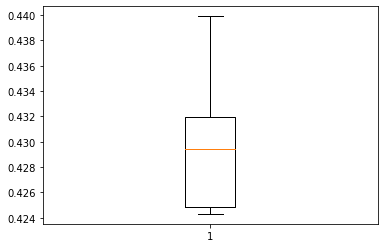

In [35]:
plt.boxplot(x_gb)

In [36]:
#moyenne des resultats
y_gb

0.4299468791500664

<BarContainer object of 9 artists>

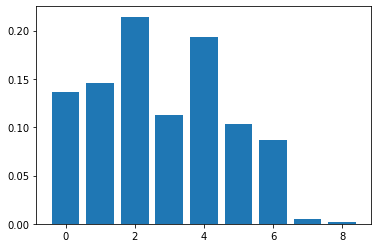

In [37]:
#coeffs
plt.bar(range(9),h_gb)

<BarContainer object of 42168 artists>

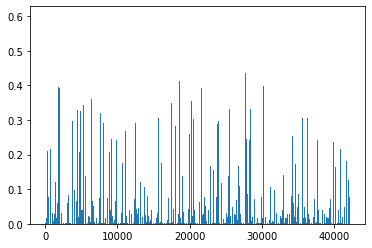

In [41]:
#distribution des probas
plt.bar(np.arange(len(proba_gb[:,1])), proba_gb[:,1])

<font color = 'blue'>
Ici on compare toutes les méthodes entre elles avec les boxplots  

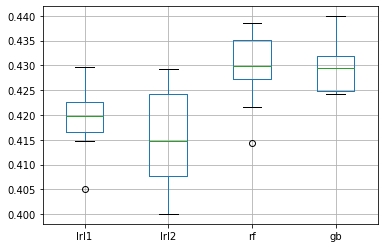

In [38]:
df = np.zeros((10,4))
df[:,0] = x_lrl1
df[:,1] = x_lrl2
df[:,2] = x_rf
df[:,3] = x_gb
dataframe_method = pd.DataFrame(df, columns = ["lrl1", "lrl2", "rf", "gb"])
dataframe_method.boxplot(return_type = 'dict')
plt.show()

<font color = 'blue'>
Maintenant on regarde ce que cela donne en centrant les variables quantitatives. 

<font color = 'blue'>
Maintenant on regarde avec de l'oversampling